## **Задача 3**

Решить краевую задачу двумя методами:

$$y'' + (x^2 - 3)y' + (x^2 - 3)cos(x)y = 2 - 6x + 2x^3 +(x^2 - 3)e^x sin(x)1 + cos x) + cos(x)(e^x + (x^2 - 1) + x^4 - 3x^2)$$

С краевыми условиями y(0) = 0, y($\pi) = \pi^2$.


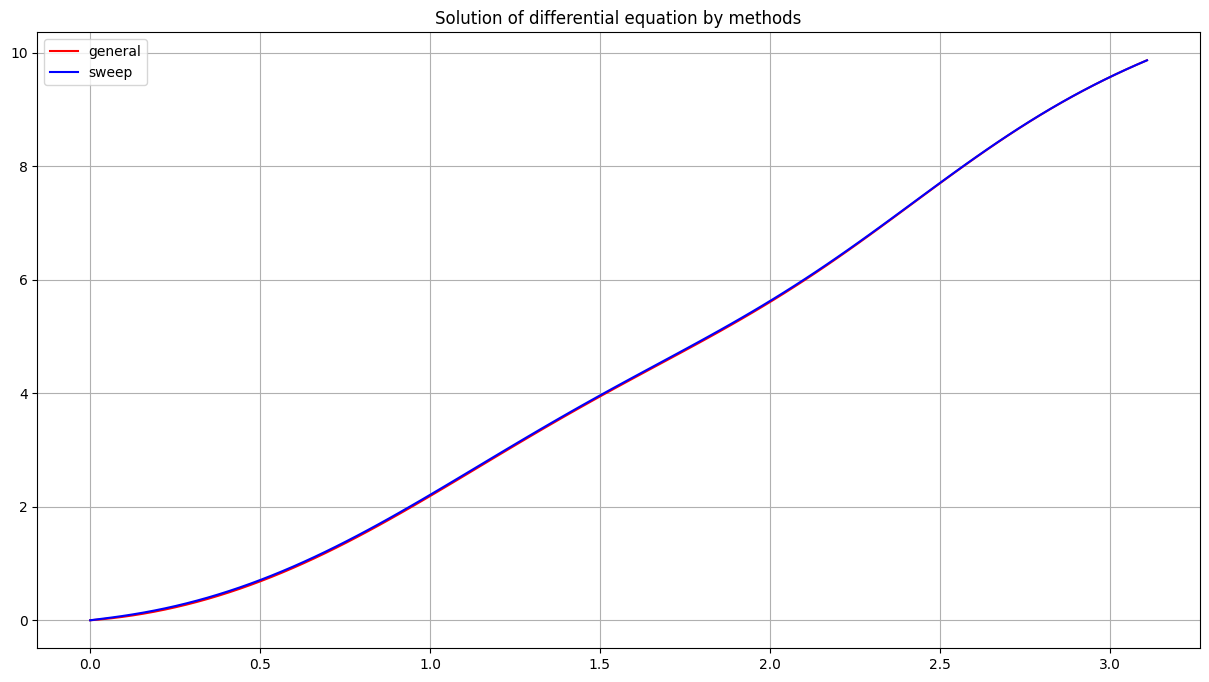

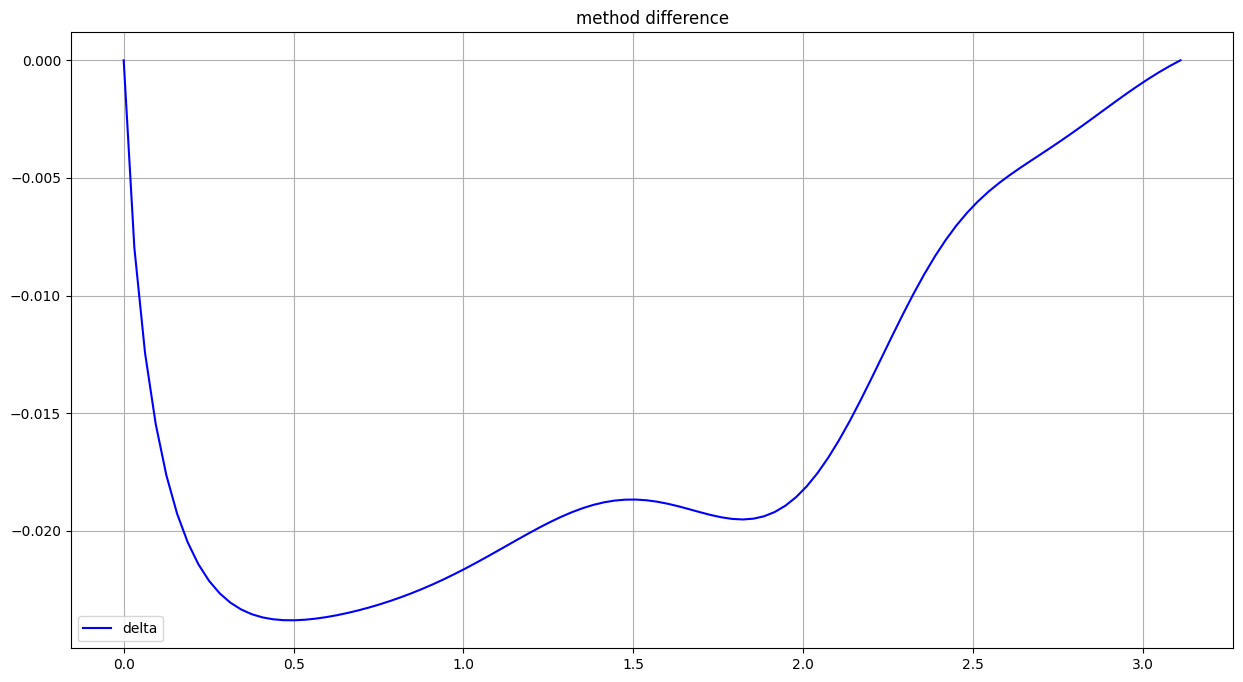

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np

# Constants
A = 0
B = math.pi

# Functions
def P(x):
    return x**2 - 3

def Q(x):
    return math.cos(x) * P(x)

def F(x):
    return 2 - 6 * x + 2 * x**3 + \
           (x**2 - 3) * math.exp(x) * math.sin(x) * \
           (1 + math.cos(x)) + math.cos(x) * \
           (math.exp(x) + (x**2 - 1) + x**4 - 3 * x**2)

# Functions to compute solutions
def getSolutionSecondOrder(f, y_at_start, y_der_at_start, args, h):
    # Computes the solution to the second-order ODE
    N = len(args)
    P_arr = np.zeros(N)
    Q_arr = np.zeros(N)
    F_arr = np.zeros(N)
    y = np.zeros(N)
    for i in range(N):
        P_arr[i] = P(args[i])
        Q_arr[i] = Q(args[i])
        F_arr[i] = f(args[i])
    y[0] = y_at_start
    y[1] = y_at_start + h * y_der_at_start
    for i in range(0, N - 2):
        y[i+2] = (F_arr[i] - Q_arr[i] * y[i]) * h * h - \
                 P_arr[i] * (y[i+1] - y[i]) * h + 2 * y[i+1] - y[i]
    return y

def getGeneralSolution(args, a, b, h):
    # Computes the general solution to the ODE using the method of undetermined coefficients
    N = len(args) - 1
    def zero(x):
        return 0
    y_part = getSolutionSecondOrder(F, 0, 0, args, h)
    y1 = getSolutionSecondOrder(zero, 1, 0, args, h)
    y2 = getSolutionSecondOrder(zero, 0, 1, args, h)
    y = y_part + a * y1 + (b - y_part[-1] - a * y1[-1]) / y2[-1] * y2
    return y

def getSolutionFirstOrderZ1(z1_at_start, args, h):
    # Computes the solution to the first-order ODE for Z1' = -Q * Z1^2 - P * Z1 + 1
    N = len(args)
    P_arr = np.zeros(N)
    Q_arr = np.zeros(N)
    z1 = np.zeros(N)
    for i in range(N):
        P_arr[i] = P(args[i])
        Q_arr[i] = Q(args[i])
    z1[0] = z1_at_start
    for i in range(0, N - 1):
        z1[i+1] = (z1[i] * z1[i] * Q_arr[i] + z1[i] * P_arr[i] + 1) * h + z1[i]
    return z1

def getSolutionFirstOrderZ2(z1, y_at_start, args, h):
    # Computes the solution to the first-order ODE for Z2' = -Z1 * (Z2 * Q + F)
    N = len(args)
    F_arr = np.zeros(N)
    Q_arr = np.zeros(N)
    z2 = np.zeros(N)
    for i in range(N):
        Q_arr[i] = Q(args[i])
        F_arr[i] = F(args[i])
    z2[0] = y_at_start
    for i in range(0, N - 1):
        z2[i+1] = (z1[i] * z2[i] * Q_arr[i] - z1[i] * F_arr[i]) * h + z2[i]
    return z2

def getSolutionFirstOrderY(z1, z2, y_at_end, h, N):
    # Computes the solution to the first-order ODE for Z1 * Y' = Y - Z2
    y = np.zeros(N)
    y[N-1] = y_at_end
    for i in range(N-1, 0, -1):
        y[i-1] = (y[i] * z1[i-1] + z2[i-1] * h) / (z1[i-1] + h)
    return y

def getSweepSolution(args, a, b, h):
    # Computes the sweep solution to the ODE using the method of sweep
    N = len(args)
    z1 = getSolutionFirstOrderZ1(0, args, h)
    z2 = getSolutionFirstOrderZ2(z1, a, args, h)
    y = getSolutionFirstOrderY(z1, z2, b, h, N)
    return y

# Main function
def main():
    N = 100
    a = 0
    b = math.pi**2
    h = (B - A) / N
    args = np.arange(A, B, h)
    
    general_vals = getGeneralSolution(args, a, b, h)
    sweep_vals = getSweepSolution(args, a, b, h)
    plt.figure(figsize=(15, 8))
    plt.title("Solution of differential equation by methods")
    plt.plot(args, general_vals, 'r', label="general")
    plt.plot(args, sweep_vals, 'b', label = "sweep")
    plt.legend()
    plt.grid()
    plt.show()
    
    sub = []
    for i in range(len(general_vals)):
        sub.append(general_vals[i] - sweep_vals[i])
    
    plt.figure(figsize = (15, 8))
    plt.title("method difference")
    plt.plot(args, sub, 'b', label = "delta")
    plt.legend()
    plt.grid()
    plt.show()

main()